In [1]:
# pip install pandas_profiling
# !pip install pydantic-settings
# !pip install ydata-profiling
# !pip install "pydantic==1.*"
# !pip install -U pydantic

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
# from pydantic_settings import BaseSettings
# from ydata_profiling import ProfileReport

### Loading the dataset

In [3]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [4]:
df

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

### Understanding the Data by doing EDA

In [5]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [9]:
df.sample(5)

customer_id  credit_score  country  gender  age  tenure    balance  \
7239     15772329           580  Germany    Male   45       8  103741.14   
8778     15761606           617    Spain  Female   37       9  101707.80   
1676     15658057           812    Spain  Female   44       8       0.00   
5224     15718216           803    Spain    Male   43       3       0.00   
6186     15703037           618   France    Male   37       5       0.00   

      products_number  credit_card  active_member  estimated_salary  churn  
7239                1            1              0          47428.73      1  
8778                1            1              0         123866.28      0  
1676                3            1              0          66926.83      1  
5224                1            1              0          72051.44      0  
6186                1            0              1         178705.45      1

In [10]:
df['active_member'].nunique()

2

In [11]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

In [12]:
df_1 = df.iloc[:,1:]

In [13]:
df_1.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [14]:
df_1.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [15]:
df_1.shape

(10000, 11)

In [16]:
df_1.describe()

credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [17]:
# df_1.describe()

In [18]:
df_1.duplicated().sum()

0

In [19]:
df_1.corr()

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_12703/2471619009.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.corr()


credit_score       age    tenure   balance  products_number  \
credit_score          1.000000 -0.003965  0.000842  0.006268         0.012238   
age                  -0.003965  1.000000 -0.009997  0.028308        -0.030680   
tenure                0.000842 -0.009997  1.000000 -0.012254         0.013444   
balance               0.006268  0.028308 -0.012254  1.000000        -0.304180   
products_number       0.012238 -0.030680  0.013444 -0.304180         1.000000   
credit_card          -0.005458 -0.011721  0.022583 -0.014858         0.003183   
active_member         0.025651  0.085472 -0.028362 -0.010084         0.009612   
estimated_salary     -0.001384 -0.007201  0.007784  0.012797         0.014204   
churn                -0.027094  0.285323 -0.014001  0.118533        -0.047820   

                  credit_card  active_member  estimated_salary     churn  
credit_score        -0.005458       0.025651         -0.001384 -0.027094  
age                 -0.011721       0.085472         -0.007201  0.285323  
tenure               0.022583      -0.028362          0.007784 -0.014001  
balance             -0.014858      -0.010084          0.012797  0.118533  
products_number      0.003183       0.009612          0.014204 -0.047820  
credit_card          1.000000      -0.011866         -0.009933 -0.007138  
active_member       -0.011866       1.000000         -0.011421 -0.156128  
estimated_salary    -0.009933      -0.011421          1.000000  0.012097  
churn               -0.007138      -0.156128          0.012097  1.000000

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_12703/1660795788.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr(), cmap='YlGnBu', annot=True)


<Axes: >

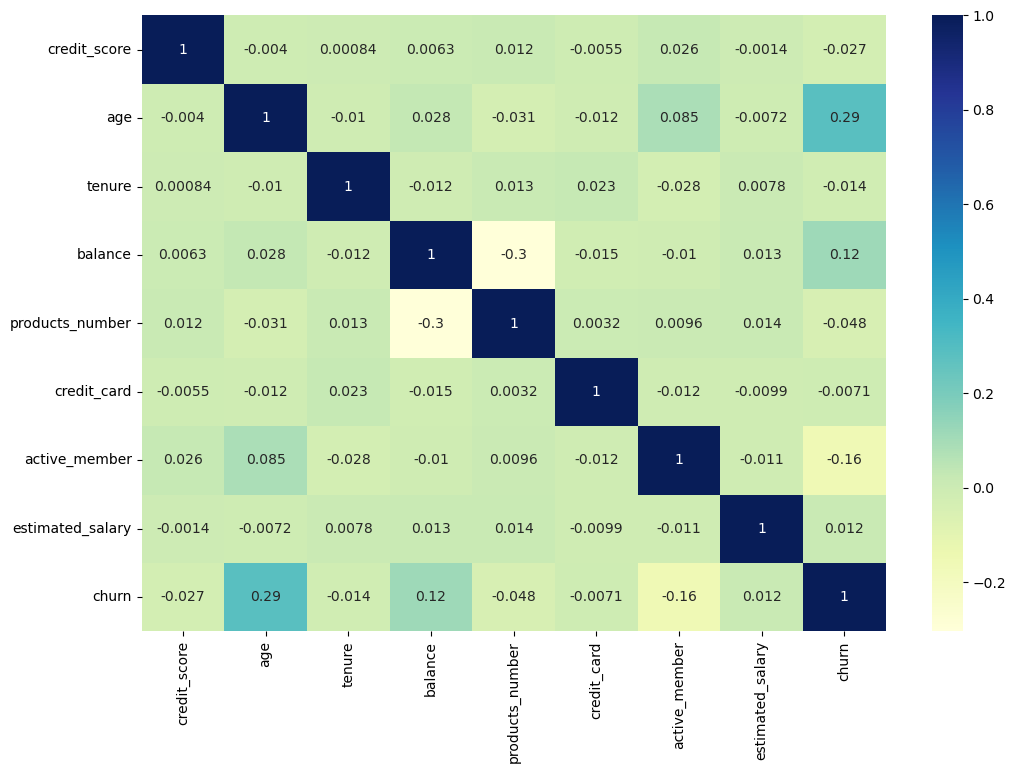

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df_1.corr(), cmap='YlGnBu', annot=True)

+ So here the findings would be the churn(target column) is more coorelated with age column.


### Visualising the individual columns

In [21]:
df_1.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [22]:
df_1['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

(array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5457.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

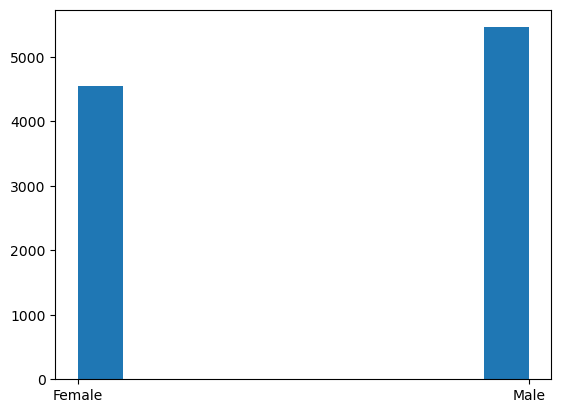

In [23]:
plt.hist(df_1['gender'])

(array([5014.,    0.,    0.,    0.,    0., 2477.,    0.,    0.,    0.,
        2509.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

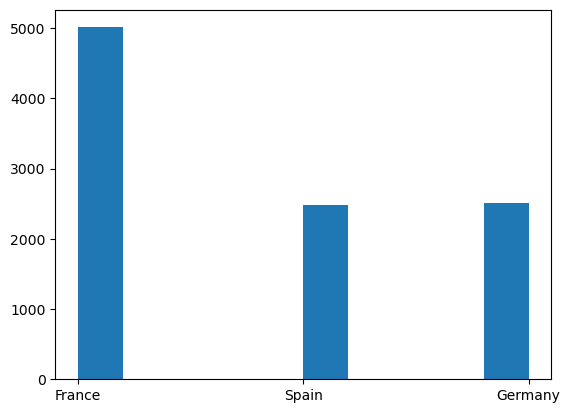

In [24]:
plt.hist(df_1['country'])

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_12703/2681961566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['credit_score'])


<Axes: xlabel='credit_score', ylabel='Density'>

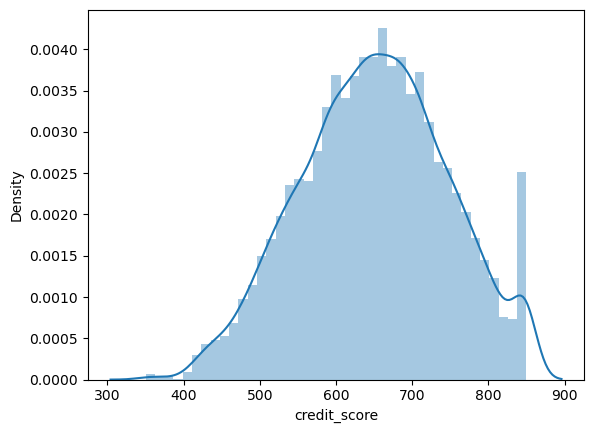

In [25]:
sns.distplot(df_1['credit_score'])

In [26]:
df_1.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [27]:
df_1['country'].dtype == 'O'
# df_1['credit_score'].dtype == 'int64'

True

In [28]:
column_names = list(df_1.columns)

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_12703/655270556.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[i],axlabel=i)
/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_12703/655270556.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[i],axlabel=i)


cannot perform distribution plot graph for country
cannot perform distribution plot graph for gender


/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_12703/655270556.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[i],axlabel=i)
/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_12703/655270556.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[i],axlabel=i)
/var

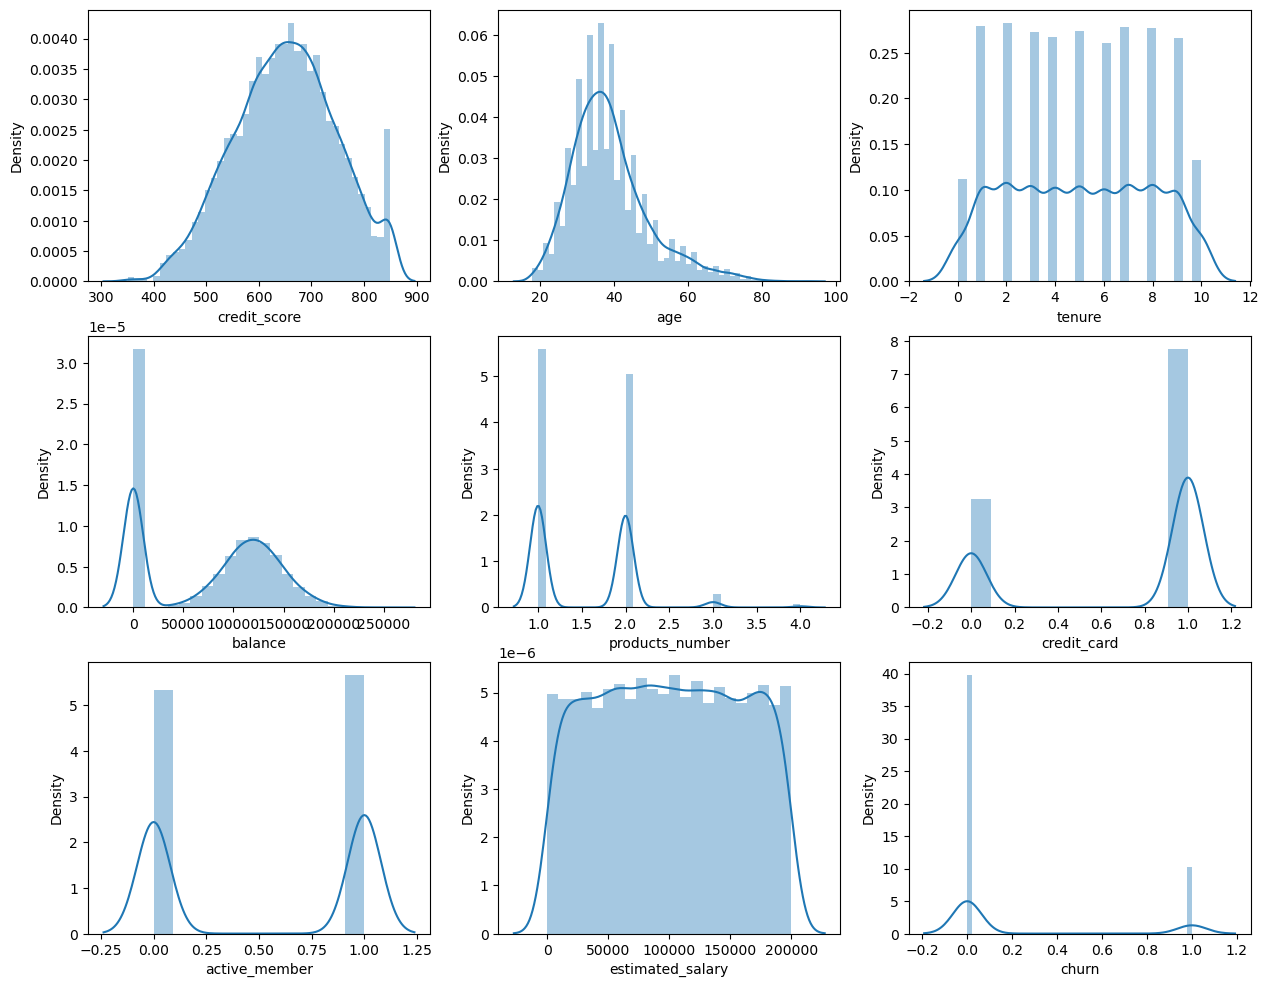

In [29]:
count = 1
fig = plt.figure(figsize=(15,12))
for i in column_names:
    if df_1[i].dtype == 'O':
        print('cannot perform distribution plot graph for', i)
        continue
    ax1 = plt.subplot(3,3,count, )
    count = count +1 
    sns.distplot(df_1[i],axlabel=i)

<Axes: >

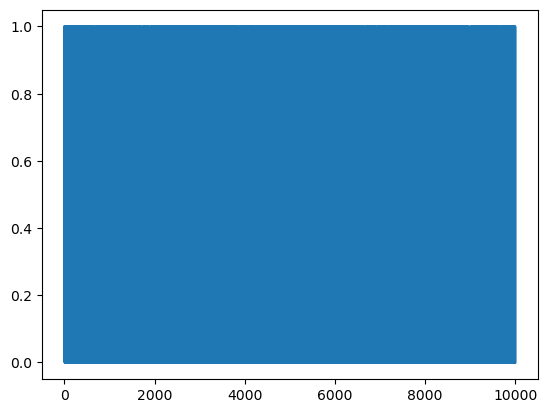

In [30]:
df_1['churn'].plot(x='gender')

In [31]:
df_1['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [32]:
df_1[df_1['churn'] == 0 ]

credit_score country  gender  age  tenure    balance  products_number  \
1              608   Spain  Female   41       1   83807.86                1   
3              699  France  Female   39       1       0.00                2   
4              850   Spain  Female   43       2  125510.82                1   
6              822  France    Male   50       7       0.00                2   
8              501  France    Male   44       4  142051.07                2   
...            ...     ...     ...  ...     ...        ...              ...   
9993           644  France    Male   28       7  155060.41                1   
9994           800  France  Female   29       2       0.00                2   
9995           771  France    Male   39       5       0.00                2   
9996           516  France    Male   35      10   57369.61                1   
9999           792  France  Female   28       4  130142.79                1   

      credit_card  active_member  estimated_salary  churn  
1               0              1         112542.58      0  
3               0              0          93826.63      0  
4               1              1          79084.10      0  
6               1              1          10062.80      0  
8               0              1          74940.50      0  
...           ...            ...               ...    ...  
9993            1              0          29179.52      0  
9994            0              0         167773.55      0  
9995            1              0          96270.64      0  
9996            1              1         101699.77      0  
9999            1              0          38190.78      0  

[7963 rows x 11 columns]

In [33]:
df_1[df_1['gender'] == 'Female']

credit_score  country  gender  age  tenure    balance  products_number  \
0              619   France  Female   42       2       0.00                1   
1              608    Spain  Female   41       1   83807.86                1   
2              502   France  Female   42       8  159660.80                3   
3              699   France  Female   39       1       0.00                2   
4              850    Spain  Female   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9982           655  Germany  Female   46       7  137145.12                1   
9991           597   France  Female   53       4   88381.21                1   
9994           800   France  Female   29       2       0.00                2   
9997           709   France  Female   36       7       0.00                1   
9999           792   France  Female   28       4  130142.79                1   

      credit_card  active_member  estimated_salary  churn  
0               1              1         101348.88      1  
1               0              1         112542.58      0  
2               1              0         113931.57      1  
3               0              0          93826.63      0  
4               1              1          79084.10      0  
...           ...            ...               ...    ...  
9982            1              0         115146.40      1  
9991            1              0          69384.71      1  
9994            0              0         167773.55      0  
9997            0              1          42085.58      1  
9999            1              0          38190.78      0  

[4543 rows x 11 columns]

In [34]:
df_female_0 = df_1[(df_1['churn'] == 0) & (df_1['gender'] == 'Female')]

In [35]:
df_male_0 = df_1[(df_1['churn'] == 0) & (df_1['gender'] == 'Male')]

In [36]:
df_female_1 = df_1[(df_1['churn'] == 1) & (df_1['gender'] == 'Female')]

In [37]:
df_male_1 = df_1[(df_1['churn'] == 1) & (df_1['gender'] == 'Male')]

In [38]:
df_0 = pd.concat([df_female_0,df_male_0])

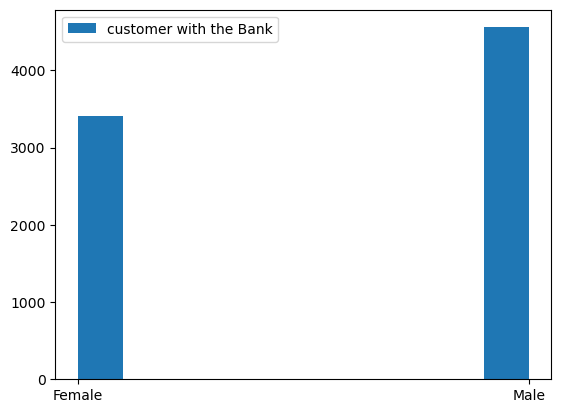

In [39]:
plt.hist(df_0['gender'], label='customer with the Bank')
plt.legend()

In [40]:
df_01 = pd.concat([df_female_1,df_male_1])

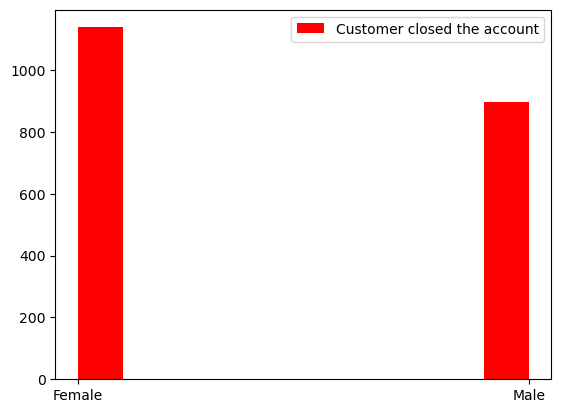

In [41]:
plt.hist(df_01['gender'], color='red', label='Customer closed the account')
plt.legend()

(array([3404.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4559.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

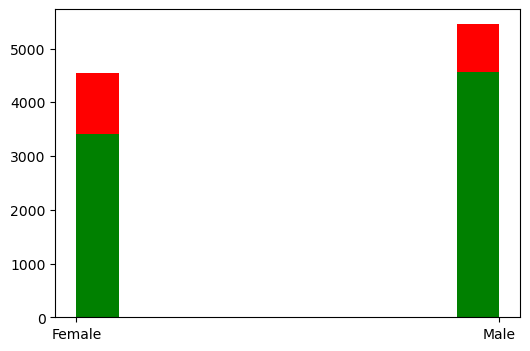

In [42]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

x_value = [0,1]
ax1.hist(df_1['gender'],color='Red',label='closed account with Bank')
ax1.hist(df_0['gender'], color='green', label='still with the Bank')


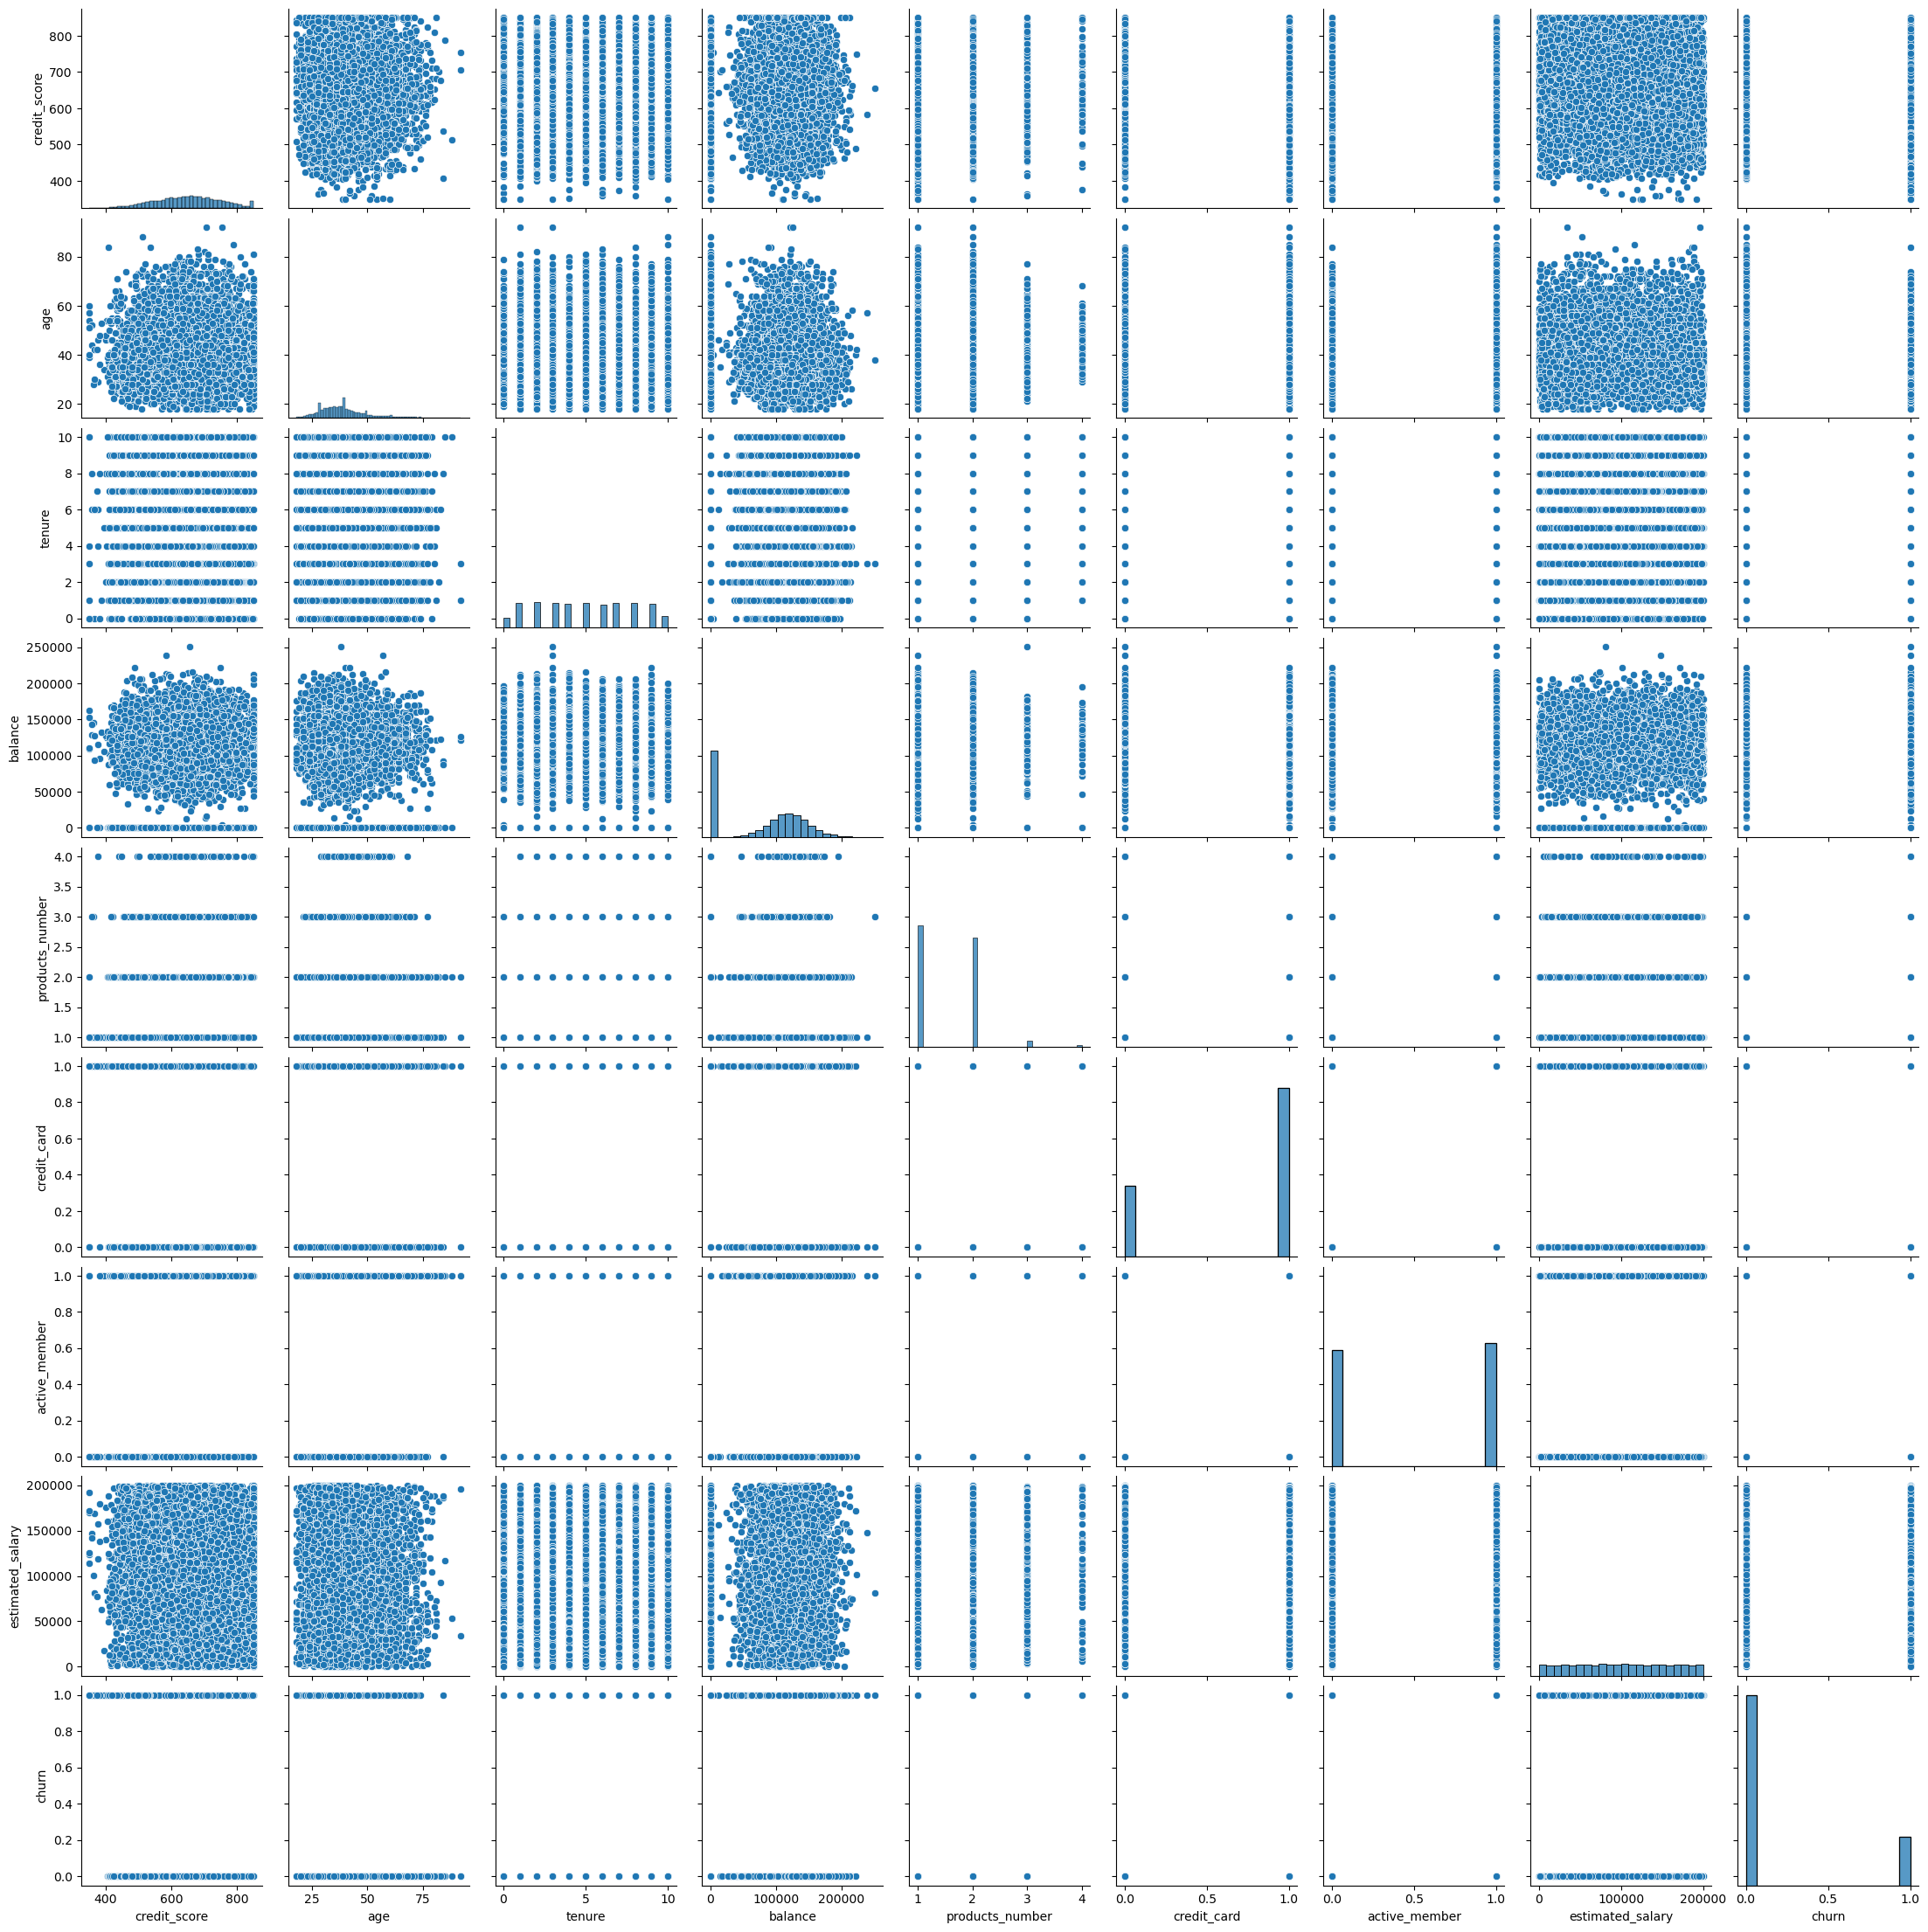

In [43]:
sns.pairplot(df_1)

<Axes: ylabel='count'>

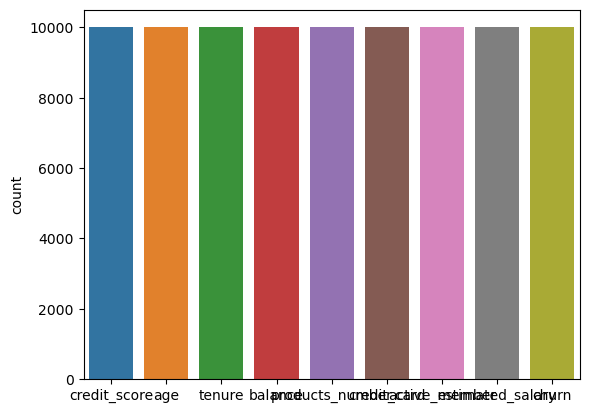

In [44]:

sns.countplot(df_1)

### Feature Engineering

In [45]:
df_1.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

In [46]:
df.shape

(10000, 12)

In [47]:
ct_obj = ColumnTransformer(transformers=[('tf1',OneHotEncoder(),['country','gender'])], 
                           remainder='passthrough')

In [48]:
result = ct_obj.fit_transform(df_1)

In [49]:
df_1['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [50]:
df_1.shape

(10000, 11)

In [51]:
result.shape

(10000, 14)

In [52]:
df_handling_categorical = pd.DataFrame(result)

In [53]:
df_handling_categorical.sample()

0    1    2    3    4      5     6    7    8    9    10   11        12  \
9586  1.0  0.0  0.0  1.0  0.0  546.0  20.0  6.0  0.0  1.0  0.0  1.0  20508.85   

       13  
9586  0.0

In [54]:
df_handling_categorical.columns = ['country_1','country_2','country_3' ,'gender1','gender2', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary','churn']

In [55]:
df_handling_categorical

country_1  country_2  country_3  gender1  gender2  credit_score   age  \
0           1.0        0.0        0.0      1.0      0.0         619.0  42.0   
1           0.0        0.0        1.0      1.0      0.0         608.0  41.0   
2           1.0        0.0        0.0      1.0      0.0         502.0  42.0   
3           1.0        0.0        0.0      1.0      0.0         699.0  39.0   
4           0.0        0.0        1.0      1.0      0.0         850.0  43.0   
...         ...        ...        ...      ...      ...           ...   ...   
9995        1.0        0.0        0.0      0.0      1.0         771.0  39.0   
9996        1.0        0.0        0.0      0.0      1.0         516.0  35.0   
9997        1.0        0.0        0.0      1.0      0.0         709.0  36.0   
9998        0.0        1.0        0.0      0.0      1.0         772.0  42.0   
9999        1.0        0.0        0.0      1.0      0.0         792.0  28.0   

      tenure    balance  products_number  credit_card  active_member  \
0        2.0       0.00              1.0          1.0            1.0   
1        1.0   83807.86              1.0          0.0            1.0   
2        8.0  159660.80              3.0          1.0            0.0   
3        1.0       0.00              2.0          0.0            0.0   
4        2.0  125510.82              1.0          1.0            1.0   
...      ...        ...              ...          ...            ...   
9995     5.0       0.00              2.0          1.0            0.0   
9996    10.0   57369.61              1.0          1.0            1.0   
9997     7.0       0.00              1.0          0.0            1.0   
9998     3.0   75075.31              2.0          1.0            0.0   
9999     4.0  130142.79              1.0          1.0            0.0   

      estimated_salary  churn  
0            101348.88    1.0  
1            112542.58    0.0  
2            113931.57    1.0  
3             93826.63    0.0  
4             79084.10    0.0  
...                ...    ...  
9995          96270.64    0.0  
9996         101699.77    0.0  
9997          42085.58    1.0  
9998          92888.52    1.0  
9999          38190.78    0.0  

[10000 rows x 14 columns]

### Checking for the outliers

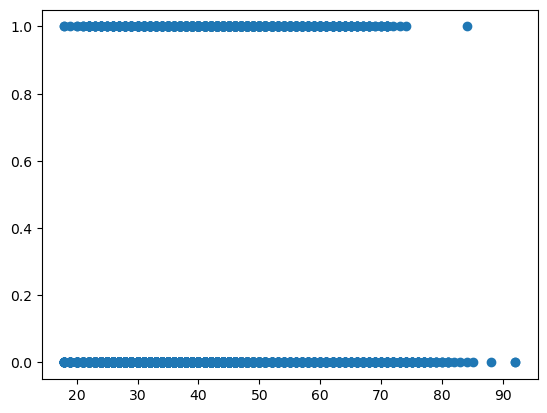

In [56]:
plt.scatter(df_handling_categorical['age'],df_handling_categorical['churn'])

+ applying the z-score method for handling the outliers as we can see in the above graph

In [57]:
mean_age = np.mean(df_handling_categorical['age'])
std_age = np.std(df_handling_categorical['age'])

In [58]:
z_score_upper = mean_age + 4.5 * std_age
z_score_lower = mean_age - 3 * std_age

In [59]:
z_score_lower

7.459953855185223

In [60]:
z_score_upper

86.11456921722217

In [61]:
df_handling_categorical[(df_handling_categorical['age']<z_score_upper) & (df_handling_categorical['age']>z_score_lower)]

country_1  country_2  country_3  gender1  gender2  credit_score   age  \
0           1.0        0.0        0.0      1.0      0.0         619.0  42.0   
1           0.0        0.0        1.0      1.0      0.0         608.0  41.0   
2           1.0        0.0        0.0      1.0      0.0         502.0  42.0   
3           1.0        0.0        0.0      1.0      0.0         699.0  39.0   
4           0.0        0.0        1.0      1.0      0.0         850.0  43.0   
...         ...        ...        ...      ...      ...           ...   ...   
9995        1.0        0.0        0.0      0.0      1.0         771.0  39.0   
9996        1.0        0.0        0.0      0.0      1.0         516.0  35.0   
9997        1.0        0.0        0.0      1.0      0.0         709.0  36.0   
9998        0.0        1.0        0.0      0.0      1.0         772.0  42.0   
9999        1.0        0.0        0.0      1.0      0.0         792.0  28.0   

      tenure    balance  products_number  credit_card  active_member  \
0        2.0       0.00              1.0          1.0            1.0   
1        1.0   83807.86              1.0          0.0            1.0   
2        8.0  159660.80              3.0          1.0            0.0   
3        1.0       0.00              2.0          0.0            0.0   
4        2.0  125510.82              1.0          1.0            1.0   
...      ...        ...              ...          ...            ...   
9995     5.0       0.00              2.0          1.0            0.0   
9996    10.0   57369.61              1.0          1.0            1.0   
9997     7.0       0.00              1.0          0.0            1.0   
9998     3.0   75075.31              2.0          1.0            0.0   
9999     4.0  130142.79              1.0          1.0            0.0   

      estimated_salary  churn  
0            101348.88    1.0  
1            112542.58    0.0  
2            113931.57    1.0  
3             93826.63    0.0  
4             79084.10    0.0  
...                ...    ...  
9995          96270.64    0.0  
9996         101699.77    0.0  
9997          42085.58    1.0  
9998          92888.52    1.0  
9999          38190.78    0.0  

[9997 rows x 14 columns]

In [62]:
final_data = df_handling_categorical[(df_handling_categorical['age']<z_score_upper) & (df_handling_categorical['age']>z_score_lower)]

In [63]:
final_data.shape

(9997, 14)

In [64]:
final_data

country_1  country_2  country_3  gender1  gender2  credit_score   age  \
0           1.0        0.0        0.0      1.0      0.0         619.0  42.0   
1           0.0        0.0        1.0      1.0      0.0         608.0  41.0   
2           1.0        0.0        0.0      1.0      0.0         502.0  42.0   
3           1.0        0.0        0.0      1.0      0.0         699.0  39.0   
4           0.0        0.0        1.0      1.0      0.0         850.0  43.0   
...         ...        ...        ...      ...      ...           ...   ...   
9995        1.0        0.0        0.0      0.0      1.0         771.0  39.0   
9996        1.0        0.0        0.0      0.0      1.0         516.0  35.0   
9997        1.0        0.0        0.0      1.0      0.0         709.0  36.0   
9998        0.0        1.0        0.0      0.0      1.0         772.0  42.0   
9999        1.0        0.0        0.0      1.0      0.0         792.0  28.0   

      tenure    balance  products_number  credit_card  active_member  \
0        2.0       0.00              1.0          1.0            1.0   
1        1.0   83807.86              1.0          0.0            1.0   
2        8.0  159660.80              3.0          1.0            0.0   
3        1.0       0.00              2.0          0.0            0.0   
4        2.0  125510.82              1.0          1.0            1.0   
...      ...        ...              ...          ...            ...   
9995     5.0       0.00              2.0          1.0            0.0   
9996    10.0   57369.61              1.0          1.0            1.0   
9997     7.0       0.00              1.0          0.0            1.0   
9998     3.0   75075.31              2.0          1.0            0.0   
9999     4.0  130142.79              1.0          1.0            0.0   

      estimated_salary  churn  
0            101348.88    1.0  
1            112542.58    0.0  
2            113931.57    1.0  
3             93826.63    0.0  
4             79084.10    0.0  
...                ...    ...  
9995          96270.64    0.0  
9996         101699.77    0.0  
9997          42085.58    1.0  
9998          92888.52    1.0  
9999          38190.78    0.0  

[9997 rows x 14 columns]

In [65]:
final_data_without_scaling = final_data

In [66]:
final_data = final_data.sample(frac=1)

In [67]:
# final_data.sample(10)

### Preparing the final data for train/test split

In [68]:
X = final_data.iloc[0:, 0:13]
y = final_data.iloc[0:,13]

### Scaling the data to a particular standard

In [69]:
std_scale = StandardScaler()

In [70]:
std_scale.fit(final_data)

StandardScaler()

In [71]:
X_scaled = std_scale.fit_transform(X)

In [72]:
X_scaled.shape

(9997, 13)

In [73]:
X_dataframe = pd.DataFrame(X_scaled)

In [74]:
X_dataframe

0         1        2         3         4         5         6   \
0     0.997303 -0.578852 -0.57377 -0.912670  0.912670  1.629377 -0.660861   
1    -1.002704  1.727558 -0.57377 -0.912670  0.912670  0.646411  0.104659   
2     0.997303 -0.578852 -0.57377  1.095686 -1.095686  1.060291  0.391729   
3    -1.002704  1.727558 -0.57377  1.095686 -1.095686  1.029250  1.252938   
4    -1.002704 -0.578852  1.74286  1.095686 -1.095686 -1.174664 -0.086721   
...        ...       ...      ...       ...       ...       ...       ...   
9992 -1.002704  1.727558 -0.57377 -0.912670  0.912670 -2.281795  0.965868   
9993  0.997303 -0.578852 -0.57377 -0.912670  0.912670  0.584329 -0.947930   
9994 -1.002704 -0.578852  1.74286 -0.912670  0.912670 -0.429679 -0.182411   
9995  0.997303 -0.578852 -0.57377 -0.912670  0.912670 -0.512455 -0.947930   
9996  0.997303 -0.578852 -0.57377  1.095686 -1.095686 -1.557504 -0.469481   

            7         8         9         10        11        12  
0    -1.387739 -1.225797  0.807772  0.646074  0.970525 -0.937196  
1    -0.696101  0.608423  0.807772  0.646074  0.970525 -0.222317  
2    -0.004462 -1.225797  0.807772  0.646074 -1.030370  0.170249  
3     0.341357  0.496567 -0.911474  0.646074 -1.030370  0.454609  
4    -1.387739 -1.225797  0.807772 -1.547811  0.970525 -1.023570  
...        ...       ...       ...       ...       ...       ...  
9992 -0.696101  0.971724 -0.911474  0.646074 -1.030370  0.807352  
9993 -0.350282 -1.225797  0.807772  0.646074 -1.030370  0.693220  
9994 -0.004462  0.846677 -0.911474  0.646074  0.970525 -1.274692  
9995  1.378814 -1.225797 -0.911474  0.646074  0.970525 -0.342570  
9996 -0.350282 -1.225797  0.807772  0.646074 -1.030370 -1.517461  

[9997 rows x 13 columns]

### Train/Test Split the input features & target

In [75]:
X_dataframe.shape

(9997, 13)

In [76]:
X_dataframe.columns = ['country_1', 'country_2', 'country_3', 'gender1', 'gender2',
       'credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary']

In [77]:
y.shape

(9997,)

In [78]:
X_train,X_test, y_train,y_test = train_test_split(X_dataframe,y,test_size=0.3,random_state=35)

In [79]:
X_train

country_1  country_2  country_3   gender1   gender2  credit_score  \
6414  -1.002704  -0.578852    1.74286 -0.912670  0.912670      2.063952   
8831  -1.002704  -0.578852    1.74286 -0.912670  0.912670      0.315306   
2799   0.997303  -0.578852   -0.57377 -0.912670  0.912670     -0.429679   
2561  -1.002704  -0.578852    1.74286  1.095686 -1.095686     -0.171004   
6956   0.997303  -0.578852   -0.57377 -0.912670  0.912670      0.491205   
...         ...        ...        ...       ...       ...           ...   
3007   0.997303  -0.578852   -0.57377 -0.912670  0.912670      0.646411   
7148   0.997303  -0.578852   -0.57377 -0.912670  0.912670     -0.222739   
9143   0.997303  -0.578852   -0.57377 -0.912670  0.912670     -1.143623   
1295   0.997303  -0.578852   -0.57377 -0.912670  0.912670     -0.212392   
5833   0.997303  -0.578852   -0.57377  1.095686 -1.095686     -0.253780   

           age    tenure   balance  products_number  credit_card  \
6414  0.487419  0.687176  0.202486        -0.911474     0.646074   
8831 -0.565171  1.724633 -1.225797        -0.911474    -1.547811   
2799  0.104659  0.341357 -1.225797         0.807772     0.646074   
2561 -0.373791  1.724633 -1.225797        -0.911474     0.646074   
6956  0.870178 -0.350282  0.396731         0.807772    -1.547811   
...        ...       ...       ...              ...          ...   
3007 -0.086721  1.378814 -0.067268         0.807772     0.646074   
7148  1.922767  1.378814  0.595778        -0.911474     0.646074   
9143 -1.617760 -0.350282 -1.225797         2.527018     0.646074   
1295  0.391729  1.378814 -1.225797         0.807772     0.646074   
5833  0.008969 -1.733558 -1.225797         0.807772     0.646074   

      active_member  estimated_salary  
6414      -1.030370          0.072150  
8831      -1.030370          1.012899  
2799       0.970525         -0.046531  
2561      -1.030370         -0.303596  
6956       0.970525          1.351658  
...             ...               ...  
3007       0.970525         -1.286116  
7148       0.970525          0.291410  
9143       0.970525          1.498041  
1295       0.970525         -1.143494  
5833       0.970525         -0.292106  

[6997 rows x 13 columns]

In [80]:
X_test

country_1  country_2  country_3   gender1   gender2  credit_score  \
5948  -1.002704   1.727558   -0.57377  1.095686 -1.095686     -0.595231   
3552   0.997303  -0.578852   -0.57377 -0.912670  0.912670     -0.233086   
8662  -1.002704  -0.578852    1.74286 -0.912670  0.912670      0.449817   
522    0.997303  -0.578852   -0.57377 -0.912670  0.912670      0.253224   
5546   0.997303  -0.578852   -0.57377  1.095686 -1.095686      2.063952   
...         ...        ...        ...       ...       ...           ...   
520    0.997303  -0.578852   -0.57377  1.095686 -1.095686     -0.822866   
1623   0.997303  -0.578852   -0.57377  1.095686 -1.095686      2.063952   
3915   0.997303  -0.578852   -0.57377 -0.912670  0.912670     -0.119269   
8432  -1.002704  -0.578852    1.74286  1.095686 -1.095686     -0.719396   
4803  -1.002704  -0.578852    1.74286 -0.912670  0.912670      1.318967   

           age    tenure   balance  products_number  credit_card  \
5948  0.008969  1.032995  1.200532        -0.911474     0.646074   
3552 -0.182411 -1.733558 -1.225797         0.807772     0.646074   
8662  0.008969 -1.733558  0.489759        -0.911474     0.646074   
522   2.879667 -1.387739 -1.225797         0.807772     0.646074   
5546 -0.469481 -1.041920 -1.225797         0.807772     0.646074   
...        ...       ...       ...              ...          ...   
520   0.774488  0.687176 -1.225797         0.807772    -1.547811   
1623 -0.469481 -0.350282 -0.081810         0.807772     0.646074   
3915 -1.139310  1.032995 -1.225797         0.807772     0.646074   
8432  0.487419  0.687176  1.808373         0.807772     0.646074   
4803 -0.565171 -0.004462  0.640916         0.807772     0.646074   

      active_member  estimated_salary  
5948      -1.030370         -1.266331  
3552       0.970525          1.245438  
8662       0.970525          0.038124  
522       -1.030370          0.991348  
5546       0.970525          1.245416  
...             ...               ...  
520       -1.030370          0.213469  
1623       0.970525          0.937505  
3915      -1.030370          1.602629  
8432      -1.030370         -0.957621  
4803       0.970525         -1.170980  

[3000 rows x 13 columns]

In [81]:
y_train

4316    1.0
9109    0.0
2852    0.0
4363    0.0
518     1.0
       ... 
2183    0.0
7281    1.0
2431    1.0
1143    0.0
8927    0.0
Name: churn, Length: 6997, dtype: float64

In [82]:
y_test

5776    1.0
1132    0.0
953     0.0
8304    0.0
2194    0.0
       ... 
6978    0.0
8464    0.0
780     0.0
7282    1.0
8203    0.0
Name: churn, Length: 3000, dtype: float64

### Now let's train a classification model using Logistic Regression

In [83]:
regression = LogisticRegression()
regression.fit(X_train,y_train)

LogisticRegression()

In [84]:
y_pred = regression.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [86]:
accuracy_score(y_test,y_pred)

0.8136666666666666

In [87]:
precision_score(y_test,y_pred)

0.6090909090909091

In [88]:
recall_score(y_test,y_pred)

0.22075782537067545

In [89]:
f1_score(y_test,y_pred)

0.32406287787182586

In [90]:
type(y_test)

pandas.core.series.Series

In [91]:
y_test_array = np.array(y_test)

In [92]:
type(y_test_array)

numpy.ndarray

In [93]:
y_test_array[6]

0.0

In [94]:
y_pred[6]

0.0

In [95]:
0.0==0.0

True

In [96]:
type(y_pred)

numpy.ndarray

In [97]:
count = 0
total_count = 0

In [98]:
for i in range(0,len(y_test_array)):
    total_count = total_count + 1
    if (y_test_array[i] != y_pred[i]):
#         print(f" actual value is:{y_test_array[i]}, but the predicted value is:{y_pred[i]}")
        count = count + 1

print(f"total number of wrong prediction is: {count} out of {total_count}")

total number of wrong prediction is: 559 out of 3000


### Training another model for without scaling the dataset

In [99]:
final_data_without_scaling

country_1  country_2  country_3  gender1  gender2  credit_score   age  \
0           1.0        0.0        0.0      1.0      0.0         619.0  42.0   
1           0.0        0.0        1.0      1.0      0.0         608.0  41.0   
2           1.0        0.0        0.0      1.0      0.0         502.0  42.0   
3           1.0        0.0        0.0      1.0      0.0         699.0  39.0   
4           0.0        0.0        1.0      1.0      0.0         850.0  43.0   
...         ...        ...        ...      ...      ...           ...   ...   
9995        1.0        0.0        0.0      0.0      1.0         771.0  39.0   
9996        1.0        0.0        0.0      0.0      1.0         516.0  35.0   
9997        1.0        0.0        0.0      1.0      0.0         709.0  36.0   
9998        0.0        1.0        0.0      0.0      1.0         772.0  42.0   
9999        1.0        0.0        0.0      1.0      0.0         792.0  28.0   

      tenure    balance  products_number  credit_card  active_member  \
0        2.0       0.00              1.0          1.0            1.0   
1        1.0   83807.86              1.0          0.0            1.0   
2        8.0  159660.80              3.0          1.0            0.0   
3        1.0       0.00              2.0          0.0            0.0   
4        2.0  125510.82              1.0          1.0            1.0   
...      ...        ...              ...          ...            ...   
9995     5.0       0.00              2.0          1.0            0.0   
9996    10.0   57369.61              1.0          1.0            1.0   
9997     7.0       0.00              1.0          0.0            1.0   
9998     3.0   75075.31              2.0          1.0            0.0   
9999     4.0  130142.79              1.0          1.0            0.0   

      estimated_salary  churn  
0            101348.88    1.0  
1            112542.58    0.0  
2            113931.57    1.0  
3             93826.63    0.0  
4             79084.10    0.0  
...                ...    ...  
9995          96270.64    0.0  
9996         101699.77    0.0  
9997          42085.58    1.0  
9998          92888.52    1.0  
9999          38190.78    0.0  

[9997 rows x 14 columns]

In [100]:
X = final_data_without_scaling.iloc[0:,:13]
y = final_data_without_scaling.iloc[0:,13]

In [101]:
X

country_1  country_2  country_3  gender1  gender2  credit_score   age  \
0           1.0        0.0        0.0      1.0      0.0         619.0  42.0   
1           0.0        0.0        1.0      1.0      0.0         608.0  41.0   
2           1.0        0.0        0.0      1.0      0.0         502.0  42.0   
3           1.0        0.0        0.0      1.0      0.0         699.0  39.0   
4           0.0        0.0        1.0      1.0      0.0         850.0  43.0   
...         ...        ...        ...      ...      ...           ...   ...   
9995        1.0        0.0        0.0      0.0      1.0         771.0  39.0   
9996        1.0        0.0        0.0      0.0      1.0         516.0  35.0   
9997        1.0        0.0        0.0      1.0      0.0         709.0  36.0   
9998        0.0        1.0        0.0      0.0      1.0         772.0  42.0   
9999        1.0        0.0        0.0      1.0      0.0         792.0  28.0   

      tenure    balance  products_number  credit_card  active_member  \
0        2.0       0.00              1.0          1.0            1.0   
1        1.0   83807.86              1.0          0.0            1.0   
2        8.0  159660.80              3.0          1.0            0.0   
3        1.0       0.00              2.0          0.0            0.0   
4        2.0  125510.82              1.0          1.0            1.0   
...      ...        ...              ...          ...            ...   
9995     5.0       0.00              2.0          1.0            0.0   
9996    10.0   57369.61              1.0          1.0            1.0   
9997     7.0       0.00              1.0          0.0            1.0   
9998     3.0   75075.31              2.0          1.0            0.0   
9999     4.0  130142.79              1.0          1.0            0.0   

      estimated_salary  
0            101348.88  
1            112542.58  
2            113931.57  
3             93826.63  
4             79084.10  
...                ...  
9995          96270.64  
9996         101699.77  
9997          42085.58  
9998          92888.52  
9999          38190.78  

[9997 rows x 13 columns]

In [102]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: churn, Length: 9997, dtype: float64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=35)

In [104]:
regression2 = LogisticRegression()
regression2.fit(X_train,y_train)
y_pred = regression2.predict(X_test)
accuracy_score(y_test,y_pred)

0.798

In [105]:
type(y_test)

pandas.core.series.Series

In [106]:
count = 0
total_count = 0

In [107]:
for i in range(0,len(np.array(y_test))):
    total_count = total_count + 1
    if (np.array(y_test)[i] != y_pred[i]):
#         print(f" actual value is:{y_test_array[i]}, but the predicted value is:{y_pred[i]}")
        count = count + 1

print(f"total number of wrong prediction is: {count} out of {total_count}")

total number of wrong prediction is: 606 out of 3000


In [108]:
f1_score(y_test,y_pred)

0.1217391304347826

In [109]:
600/3000

0.2